## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

## Loading the Dataset 
### We are using Bangalore weather Dataset for our weather prediction analysis. 

In [2]:
weather_data = pd.read_csv("bangalore.csv")
weather_data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16


In [6]:
weather_data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [5]:
weather_data.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16
96431,2020-01-01 23:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,66,89,0.5,1016,20,10,108,16


<AxesSubplot: >

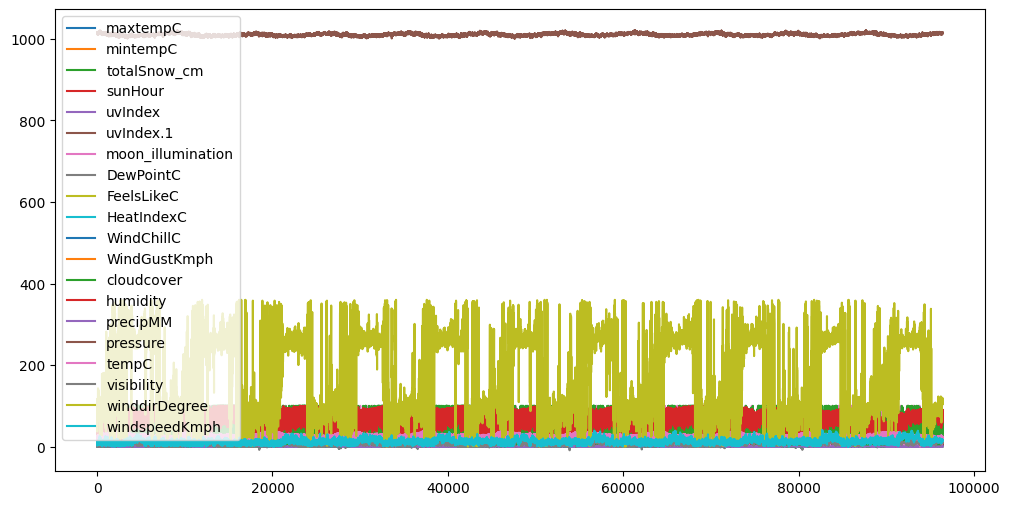

In [7]:
weather_data.plot(figsize=(12,6))

## Preprocessing: extracting relevant features and scaling the data.
### We are using "maxtempC", "mintempC", sunHour", "uvIndex", "cloudcover", "humidity", "precipMM", "pressure" parameters for weather forecasting.

In [8]:
features = ["maxtempC", "mintempC", "sunHour", "uvIndex", "cloudcover", "humidity", "precipMM", "pressure"]
weather_data = weather_data[features]
scaler = MinMaxScaler()
weather_data = scaler.fit_transform(weather_data)

## Spliting the dataset into training and testing part.

###  We are using 80% of data for our traing part and rest 20% is for the testing and evaluation part.

In [9]:
train_size = int(len(weather_data) * 0.8)
train_data, test_data = weather_data[:train_size], weather_data[train_size:]

## Defining a function to create time series dataset.

In [10]:
def create_dataset(weather_data, look_back=1):
    X, Y = [], []
    for i in range(len(weather_data) - look_back):
        X.append(weather_data[i:i+look_back])
        Y.append(weather_data[i+look_back])
    return np.array(X), np.array(Y)

## Creating time series datasets for training and testing.

In [11]:
look_back = 30 # number of past days to use as input
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

## Reshaping input data for LSTM (samples, time steps, features)

In [13]:
look_back = 30 # number of past days to use as input
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

## Reshaping input data for LSTM (samples, time steps, features)

In [14]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], len(features)))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], len(features)))

## Building the LSTM model.

In [16]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(features))))
model.add(Dense(len(features)))
model.compile(loss="mean_squared_error", optimizer="adam")

In [17]:
# train the model
model.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
2410/2410 - 31s - loss: 0.0036 - 31s/epoch - 13ms/step
Epoch 2/100
2410/2410 - 31s - loss: 8.8534e-04 - 31s/epoch - 13ms/step
Epoch 3/100
2410/2410 - 29s - loss: 7.1631e-04 - 29s/epoch - 12ms/step
Epoch 4/100
2410/2410 - 29s - loss: 6.7254e-04 - 29s/epoch - 12ms/step
Epoch 5/100
2410/2410 - 28s - loss: 6.4568e-04 - 28s/epoch - 11ms/step
Epoch 6/100
2410/2410 - 30s - loss: 6.2777e-04 - 30s/epoch - 12ms/step
Epoch 7/100
2410/2410 - 29s - loss: 6.1428e-04 - 29s/epoch - 12ms/step
Epoch 8/100
2410/2410 - 28s - loss: 6.0320e-04 - 28s/epoch - 12ms/step
Epoch 9/100
2410/2410 - 22s - loss: 5.9612e-04 - 22s/epoch - 9ms/step
Epoch 10/100
2410/2410 - 22s - loss: 5.8991e-04 - 22s/epoch - 9ms/step
Epoch 11/100
2410/2410 - 23s - loss: 5.8337e-04 - 23s/epoch - 10ms/step
Epoch 12/100
2410/2410 - 23s - loss: 5.7650e-04 - 23s/epoch - 10ms/step
Epoch 13/100
2410/2410 - 22s - loss: 5.7054e-04 - 22s/epoch - 9ms/step
Epoch 14/100
2410/2410 - 22s - loss: 5.6392e-04 - 22s/epoch - 9ms/step
Epoch 15/

## Evaluating the model on test data

In [18]:
test_loss = model.evaluate(test_X, test_Y, verbose=0)
print("Test loss:", test_loss)

Test loss: 0.0005303516518324614


## Making the predictions on test data.

In [19]:
predictions = model.predict(test_X)

602/602 [==============================] - 2s 3ms/step


## Calculating the r2 and RMSE for checking the accuracy of the model.

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# calculate R2
r2 = r2_score(test_Y, predictions)
print("R2 score:", r2)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, predictions))
print("RMSE:", rmse)

R2 score: 0.9493633933798499
RMSE: 0.023029374546779287


In [21]:
# inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test_Y = scaler.inverse_transform(test_Y)
# print example predictions and actual values
print("Predictions:", predictions[0])
print("Actual values:", test_Y[0])

Predictions: [ 2.81404076e+01  1.90256653e+01  8.62437630e+00  6.02227926e+00
  1.30498123e+01  6.15347404e+01 -6.12953305e-03  1.00921405e+03]
Actual values: [  28.    19.     8.7    6.    12.    61.     0.  1009. ]


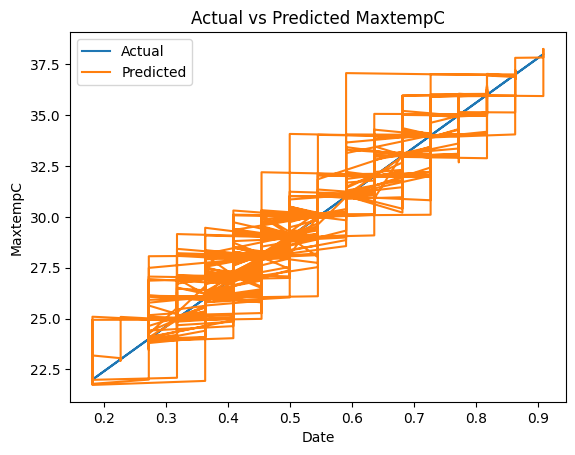

In [25]:
import matplotlib.pyplot as plt

# extract actual and predicted maxtempC values
actual_maxtempC = test_Y[:,0]
predicted_maxtempC = predictions[:,0]

# create a time axis for the test data
test_time = weather_data[train_size+look_back:, 0]

# plot the actual and predicted values of maxtempC
plt.plot(test_time, actual_maxtempC, label="Actual")
plt.plot(test_time, predicted_maxtempC, label="Predicted")

plt.title("Actual vs Predicted MaxtempC")
plt.xlabel("Date")
plt.ylabel("MaxtempC")
plt.legend()

plt.show()

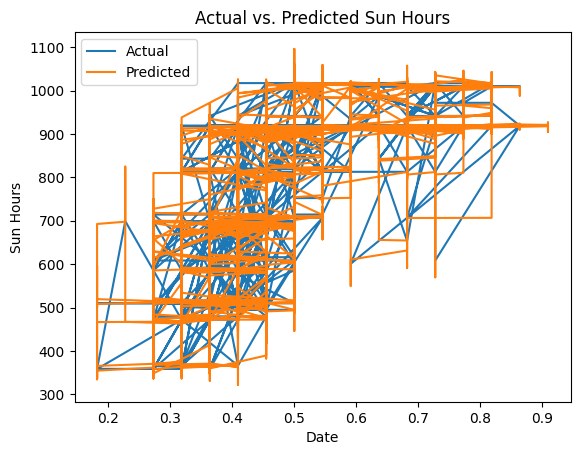

In [27]:
import matplotlib.pyplot as plt

# inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test_Y = scaler.inverse_transform(test_Y)

# extract the actual and predicted values of sunHour
actual_sunhour = test_Y[:,2]
predicted_sunhour = predictions[:,2]

# create a time axis for the test data
test_time = weather_data[train_size+look_back:,0]

# plot the actual and predicted values of sunHour
plt.plot(test_time, actual_sunhour, label="Actual")
plt.plot(test_time, predicted_sunhour, label="Predicted")

plt.xlabel("Date")
plt.ylabel("Sun Hours")
plt.title("Actual vs. Predicted Sun Hours")
plt.legend()
plt.show()

In [22]:
# get the most recent 30 days of data
recent_data = weather_data[-look_back:]

# scale the recent data
recent_data = scaler.transform(recent_data)

# reshape input data for LSTM (samples, time steps, features)
recent_data = np.reshape(recent_data, (1, look_back, len(features)))

# make predictions for the next 12 hours
forecast = []
for i in range(12):
    prediction = model.predict(recent_data)
    forecast.append(prediction[0])
    recent_data = np.append(recent_data[:,1:,:], prediction.reshape(1,1,len(features)), axis=1)

# inverse scale the forecast
forecast = scaler.inverse_transform(forecast)

# print the forecast
print("Forecast for the next 12 hours:")
for i in range(12):
    print("Hour", i+1, ":", forecast[i])

1/1 [==============================] - 0s 17ms/step


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step
Forecast for the next 12 hours:
Hour 1 : [ 1.17037272e+00  2.92975848e+01  6.80189028e-01  4.66430712e+00
 -1.95957875e+02 -1.88239111e+01 -7.41894404e+00  9.84085991e+02]
Hour 2 : [ 17.1915881   15.03379743   6.90760199   6.53334451  13.52384537
 -39.62201035  -8.44002604 971.63960791]
Hour 3 : [ 20.7495894   15.43915334   4.70680659   5.45980048 -10.55448204
 -40.55531967  -7.74598762 965.87545061]
Hour 4 : [ 14.78479785  11.07550651  10.34438444   2.05026293  89.39731717
 -11.2246325   -6.85643826 953.89057183]
Hour 5 : [ 15.21467155  10.80573365  11.02412224   2.38649535  -2.88511962
   6.23274744  -5.96833439 955.6527617 ]
Hour 6 : [ 10.93124592  10.68000144   8.9504702    2.35212421 -45.70078254
  10.08199704  -8.31627142 956.69072938]
Hour 7 : [ 11.43508297  13.83264413   8.80642242   3.04741067 -34.01235938
  34.15368247  -8.02103291 958.78448391]
Hour 8 : [ 10.0856173   14.89517479   8.9468828    3.6612255  -14.23787922
  75.